In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [7]:
y.head()
#y.tail()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [8]:
# 'MS' группирует месячные данные
y = y['co2'].resample('MS').mean()
# bfill значит, что нужно использовать значение до заполнения пропущенных значений
y = y.fillna(y.bfill())
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

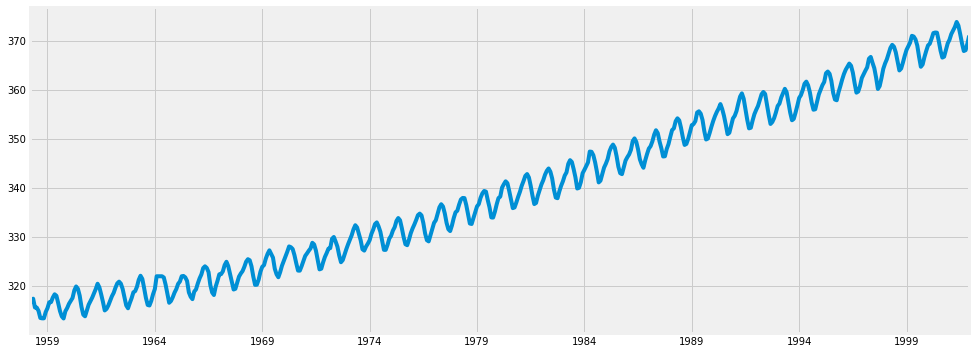

In [9]:
y.plot(figsize=(15, 6))
plt.show()

In [10]:
#В этом разделе руководства показано, как написать сценарий Python для подбора оптимальных значений параметров модели временного ряда ARIMA (p, d, q) (P, D, Q).
#Для каждой комбинации параметров функция  SARIMAX () из модуля statsmodels может подобрать новую сезонную модель ARIMA и оценить ее общее качество. Оптимальным набором параметров будет тот, в котором нужные критерии наиболее производительны. Для начала сгенерируйте различные комбинации параметров:

# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [17]:
print(seasonal_pdq)

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [ ]:
#Теперь можно использовать определенные выше триплеты параметров для автоматизации процесса оценки моделей ARIMA по различным комбинациям. В статистике и машинном обучении этот процесс известен как поиск по сетке параметров (сетчатый поиск, или оптимизация гиперпараметров).
#Используйте значение AIC (Akaike Information Criterion), которое подходит для работы с моделями ARIMA на основе statsmodels. AIC оценивает, насколько хорошо модель соответствует данным, принимая во внимание общую сложность модели. 
#Поэтому нужно найти модель с наименьшим значением AIC.


In [20]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624036737
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763919
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878350086824
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.764791278631
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.04875563832
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327694147
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066993018
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716901239
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1092.761587186384
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.43099810956
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893623981
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988551628
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194094
ARIMA

In [ ]:
#Эту модель можно проанализировать более подробно.
#Добавьте оптимальные параметры в модель SARIMAX

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
order=(1, 1, 1),
seasonal_order=(1, 1, 1, 12),
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.811      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.633      0.000       0.089       0.106


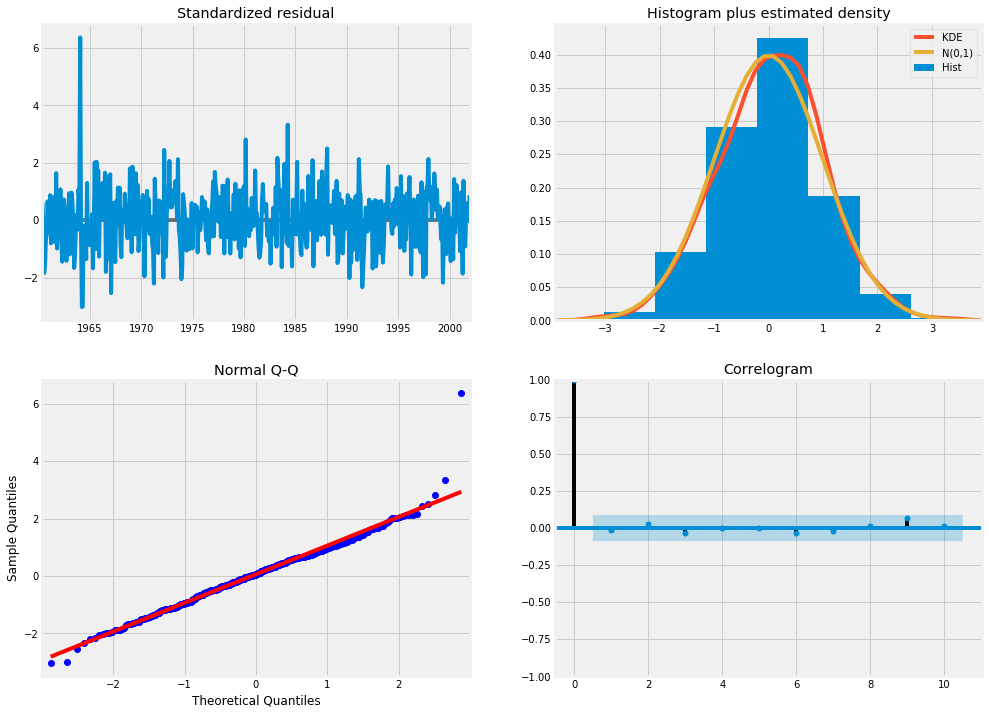

In [22]:
#Объект plot_diagnostics позволяет быстро провести диагностику модели и исследовать любое необычное поведение.
#На экране появятся несколько графиков. Главная задача – убедиться, что остатки модели некоррелированные и распределяются с нулевым средним значением. Если сезонная модель ARIMA не удовлетворяет этим свойствам, это значит, что ее еще можно улучшить.
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
#В этом случае диагностика показала, что остатки модели правильно распределяются:
#На верхнем правом графике красная линия KDE находится близко к линии N (0,1) (где N (0,1) является стандартным обозначением нормального распределения со средним 0 и стандартным отклонением 1) . Это хороший признак того, что остатки нормально распределены.
#График q-q в левом нижнем углу показывает, что упорядоченное распределение остатков (синие точки) следует линейному тренду выборок, взятых из стандартного распределения N (0, 1). Опять же, это признак того, что остатки нормально распределены.
#Остатки с течением времени (верхний левый график) не показывают явной сезонности и кажутся белыми шумами. Это подтверждается графиком автокорреляции (внизу справа), который показывает, что остатки временных рядов имеют низкую корреляцию с запаздывающими данными.

In [ ]:
#Теперь у вас есть модель временных рядов, с помощью которой можно спрогнозировать данные.

In [24]:
#Данный код начнёт прогнозирование с января 1998.
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

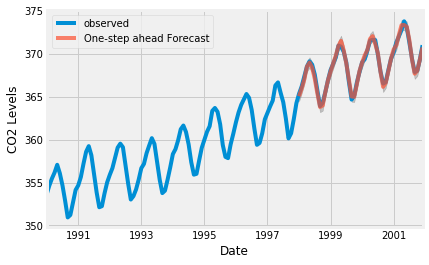

In [31]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [29]:
#Также полезно оценить точность наших прогнозов. Для этого можно использовать MSE (Mean Squared Error)

y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [ ]:
#Более точное представление точности прогнозирования может быть получено с помощью динамических прогнозов. В этом случае нужно использовать только информацию из временных рядов до определенной точки; затем прогнозы сгенерируются с помощью значений из предыдущих прогнозируемых временных точек.
#Данный код начнёт динамическое прогнозирование с января 1998 года.

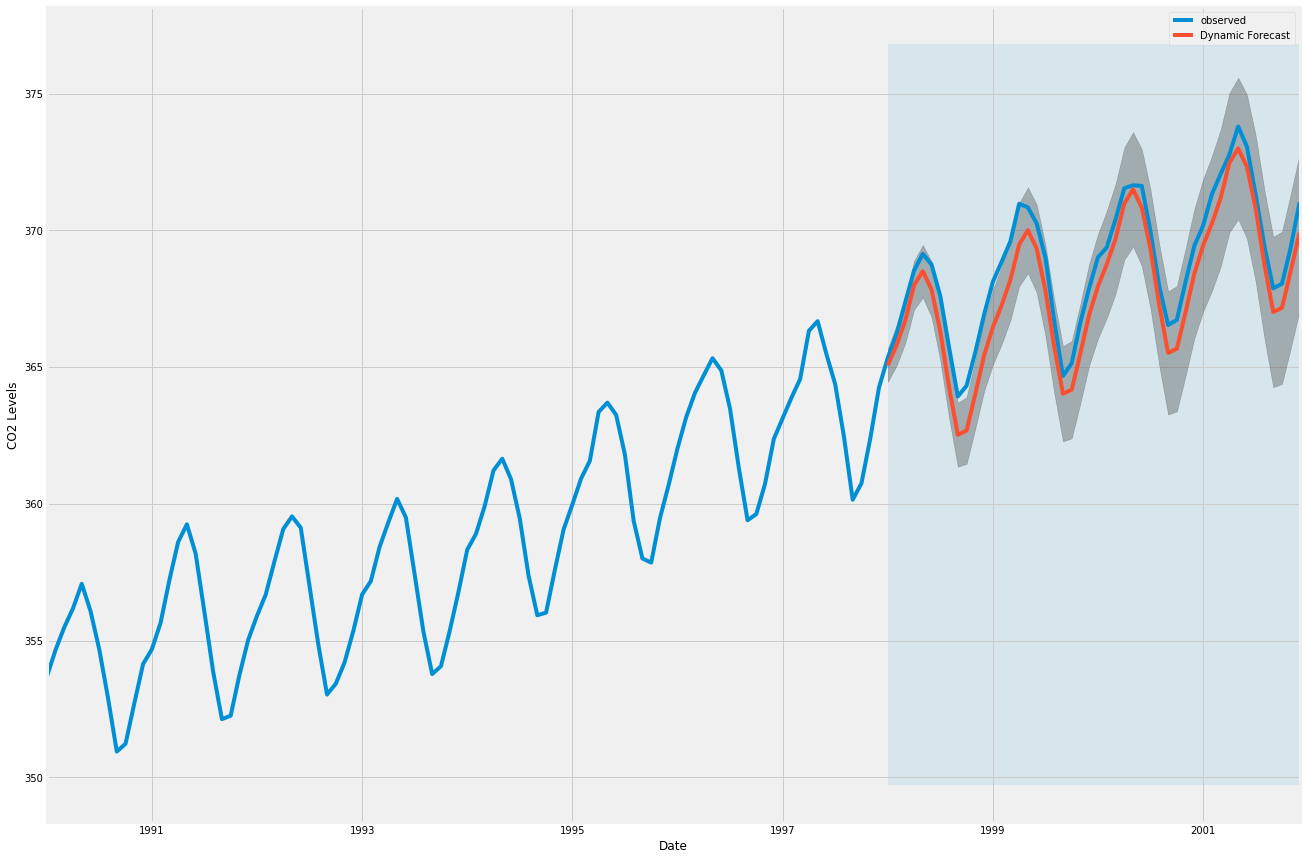

The Mean Squared Error of our forecasts is 1.01


In [34]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

# Извлечь прогнозируемые и истинные значения временного ряда
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]
# Вычислить среднеквадратичную ошибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
#Прогнозируемые данные вернули MSE 1.01. Это немного больше, чем в предыдущем разделе (чего следовало ожидать, учитывая, что здесь используются менее точные данные временных рядов).

In [ ]:
#Теперь можно использовать модель ARIMA для прогнозирования будущих значений.!!!!!

In [35]:
# Получить прогноз на 500 шагов вперёд
pred_uc = results.get_forecast(steps=500)
# Получить интервал прогноза
pred_ci = pred_uc.conf_int()

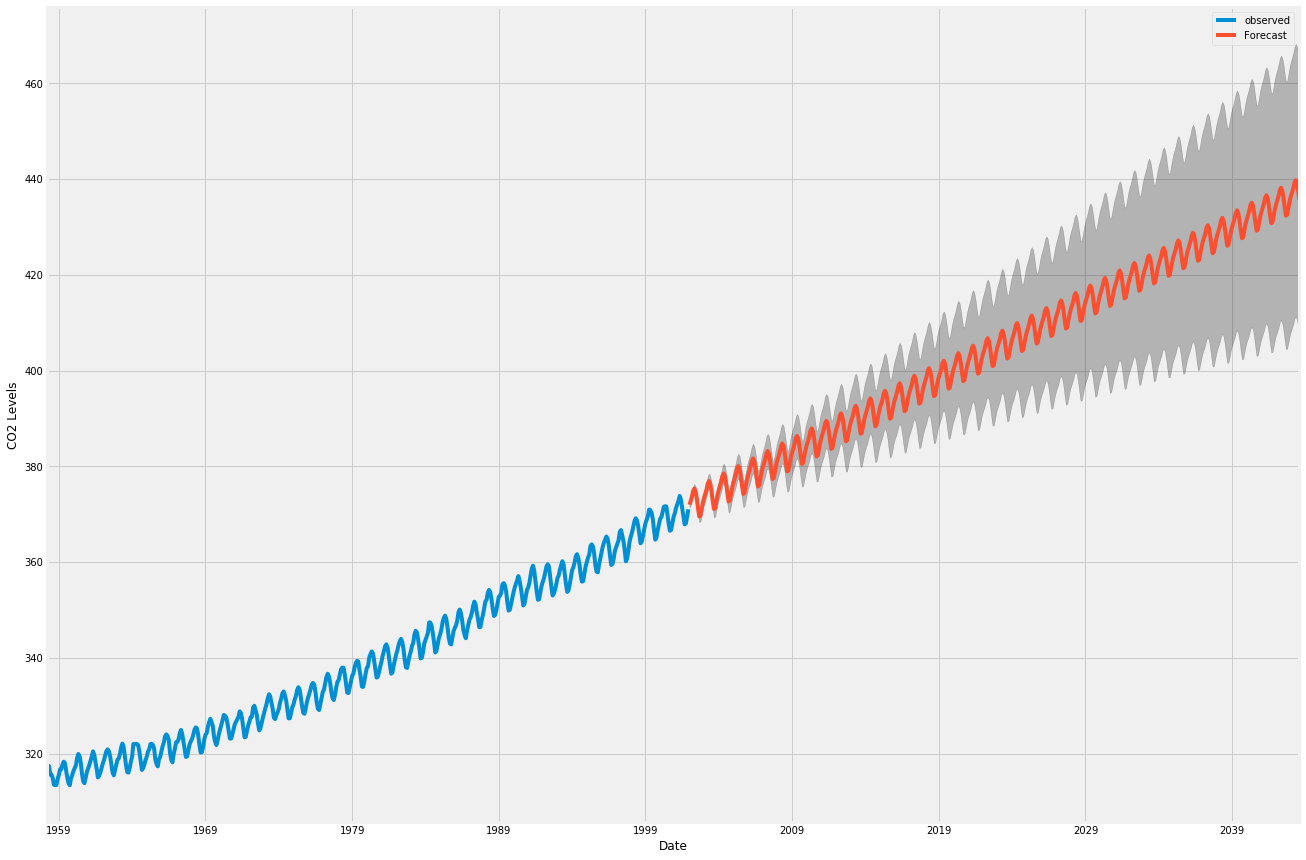

In [36]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

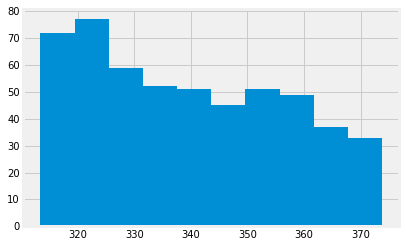

In [37]:
#построим график распределения значений
y.hist()

In [38]:
y.describe()

count    526.000000
mean     339.624826
std       17.110954
min      313.400000
25%      324.025000
50%      337.912500
75%      354.537500
max      373.800000
Name: co2, dtype: float64

In [ ]:
#Проведем тест Харки — Бера для определения номарльности распределения, чтобы подтвердить предположение об однородности. Для этого в существует функция jarque_bera(), которая возвращает значения данной статистики:

In [46]:
from statsmodels.iolib.table import SimpleTable
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(y)
a = np.vstack([jb_test])
#Функция SimpleTable() служит для оформления вывода. В нашем случае на вход ей подается массив значений (размерность не больше 2) и список с названиями столбцов или строк.
itog = SimpleTable(a, row)
print (itog)


        JB               p-value                skew             kurtosis     
------------------------------------------------------------------------------
37.13928757719633 8.616009550790973e-09 0.24946700119238624 1.7976551593918042
------------------------------------------------------------------------------


In [ ]:
#Значение данной статистика свидетельствует о том, нулевая гипотеза о нормальности распределения отвергается с малой вероятностью (probably > 0.05), и, следовательно, наш ряд имеет нормального распределения.

In [ ]:
#для проверки проверки стационарности давайте проведем обобщенный тест Дикки-Фуллера на наличие единичных корней. Для этого в модуле statsmodels есть функция adfuller():


In [48]:
test = sm.tsa.adfuller(y)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  2.359809953995363
p-value:  0.9989901230798025
Critical values:  {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}
есть единичные корни, ряд не стационарен


In [ ]:
 #во многих случаях взятие разности рядов позволяет привести ряд к стационарному y.diff

In [51]:
y1diff = y.diff(periods=1).dropna()

test = sm.tsa.adfuller(y1diff)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')


adf:  -5.0632026303185
p-value:  1.6614851317686187e-05
Critical values:  {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}
единичных корней нет, ряд стационарен


In [ ]:
#Для полной уверенности разобъем его на несколько промежутков и убедимся мат. ожидания на разных интервалах:

In [54]:
#m = y1diff.index[len(y1diff.index)/2+1] - не работает почемуто
m=250 # поставил вручную
r1 = sm.stats.DescrStatsW(y1diff[m:])
r2 = sm.stats.DescrStatsW(y1diff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.6588621947046495


In [ ]:
Высокое p-value дает нам возможность утверждать, что нулевая гипотеза о равенстве средних верна, что свидетельствует о стационарности ряда.

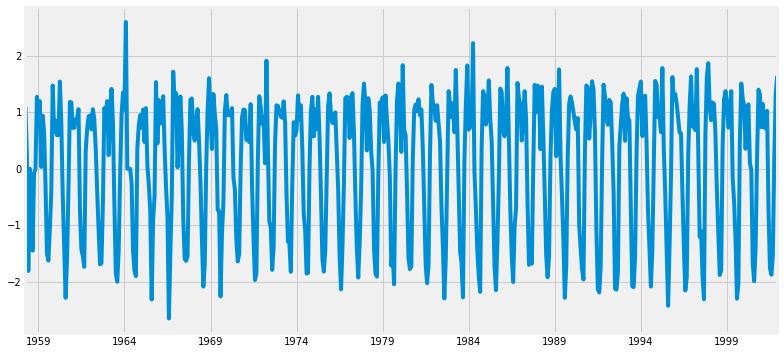

In [55]:
# let see what we have at the end
y1diff.plot(figsize=(12,6))

In [ ]:
#Тренд действительно отсутствует, таким образом ряд первых разностей является стационарным, а наш исходный ряд — интегрированным рядом первого порядка.